In [2]:
#import Dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
#Import Data
df = pd.read_csv("NCVS_Select_-_Personal_Victimization.csv")

## Basic Data Review

In [4]:
#Check for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63465 entries, 0 to 63464
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   idper           63465 non-null  object 
 1   yearq           63465 non-null  float64
 2   year            63465 non-null  int64  
 3   ager            63465 non-null  int64  
 4   sex             63465 non-null  int64  
 5   hispanic        63465 non-null  int64  
 6   race            63465 non-null  int64  
 7   race_ethnicity  63465 non-null  int64  
 8   hincome1        63465 non-null  int64  
 9   hincome2        63465 non-null  int64  
 10  marital         63465 non-null  int64  
 11  popsize         63465 non-null  int64  
 12  region          63465 non-null  int64  
 13  msa             63465 non-null  int64  
 14  locality        63465 non-null  int64  
 15  educatn1        63465 non-null  int64  
 16  educatn2        63465 non-null  int64  
 17  veteran         63465 non-null 

In [5]:

df['year']

0        2004
1        2009
2        2004
3        2011
4        2004
         ... 
63460    2021
63461    2021
63462    2021
63463    2021
63464    2021
Name: year, Length: 63465, dtype: int64

In [6]:
df.columns

Index(['idper', 'yearq', 'year', 'ager', 'sex', 'hispanic', 'race',
       'race_ethnicity', 'hincome1', 'hincome2', 'marital', 'popsize',
       'region', 'msa', 'locality', 'educatn1', 'educatn2', 'veteran',
       'citizen', 'newcrime', 'newoff', 'seriousviolent', 'notify',
       'vicservices', 'locationr', 'direl', 'weapon', 'weapcat', 'injury',
       'serious', 'treatment', 'offenderage', 'offendersex', 'offtracenew',
       'wgtviccy', 'series', 'newwgt'],
      dtype='object')

## Data Cleaning

In [42]:
df = df[['yearq','year']]
df.columns

Index(['yearq', 'year'], dtype='object')

In [44]:
df.isnull().sum()

yearq    0
year     0
dtype: int64

In [45]:
df.describe()

,yearq,year
count,63465.000000,63465.000000
mean,2004.862075,2004.611849
std,9.070978,9.071131
min,1993.100000,1993.000000
25%,1996.400000,1996.000000
50%,2003.100000,2003.000000
75%,2013.200000,2013.000000
max,2021.400000,2021.000000


## Data Preprocessing

In [46]:
quarters = []
for year in df['yearq']:
    try:
        quarter = str(year).split('.')[1]
    except IndexError:
        quarter = 'Invalid'
    quarters.append(quarter)

df['quarter'] = quarters
df['quarter'] = df['quarter'].astype(int)

In [47]:
time_df = pd.DataFrame()
time_df['YearQ'] = pd.PeriodIndex(year=df['year'].astype(int), quarter=df['quarter'])
time_df['YearQ'] = time_df['YearQ'].dt.to_timestamp()
time_df = time_df['YearQ'].value_counts().reset_index().sort_values(by=['YearQ']).reset_index(drop=True)
time_df.set_index(['YearQ'])

,count
YearQ,
1993-01-01,589
1993-04-01,536
1993-07-01,1239
1993-10-01,1366
1994-01-01,1297
...,...
2020-10-01,457
2021-01-01,450
2021-04-01,412


## Data Visualization

<Axes: title={'center': 'Cases by Year'}, xlabel='year', ylabel='count'>

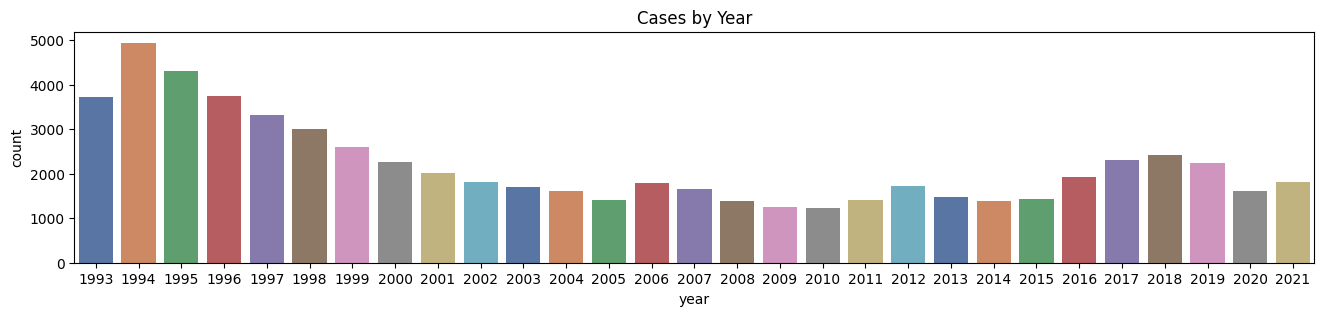

In [7]:
plt.figure(figsize=(16,3))
plt.title('Cases by Year')
sns.countplot(data=df,x='year',palette='deep')

<Axes: ylabel='count'>

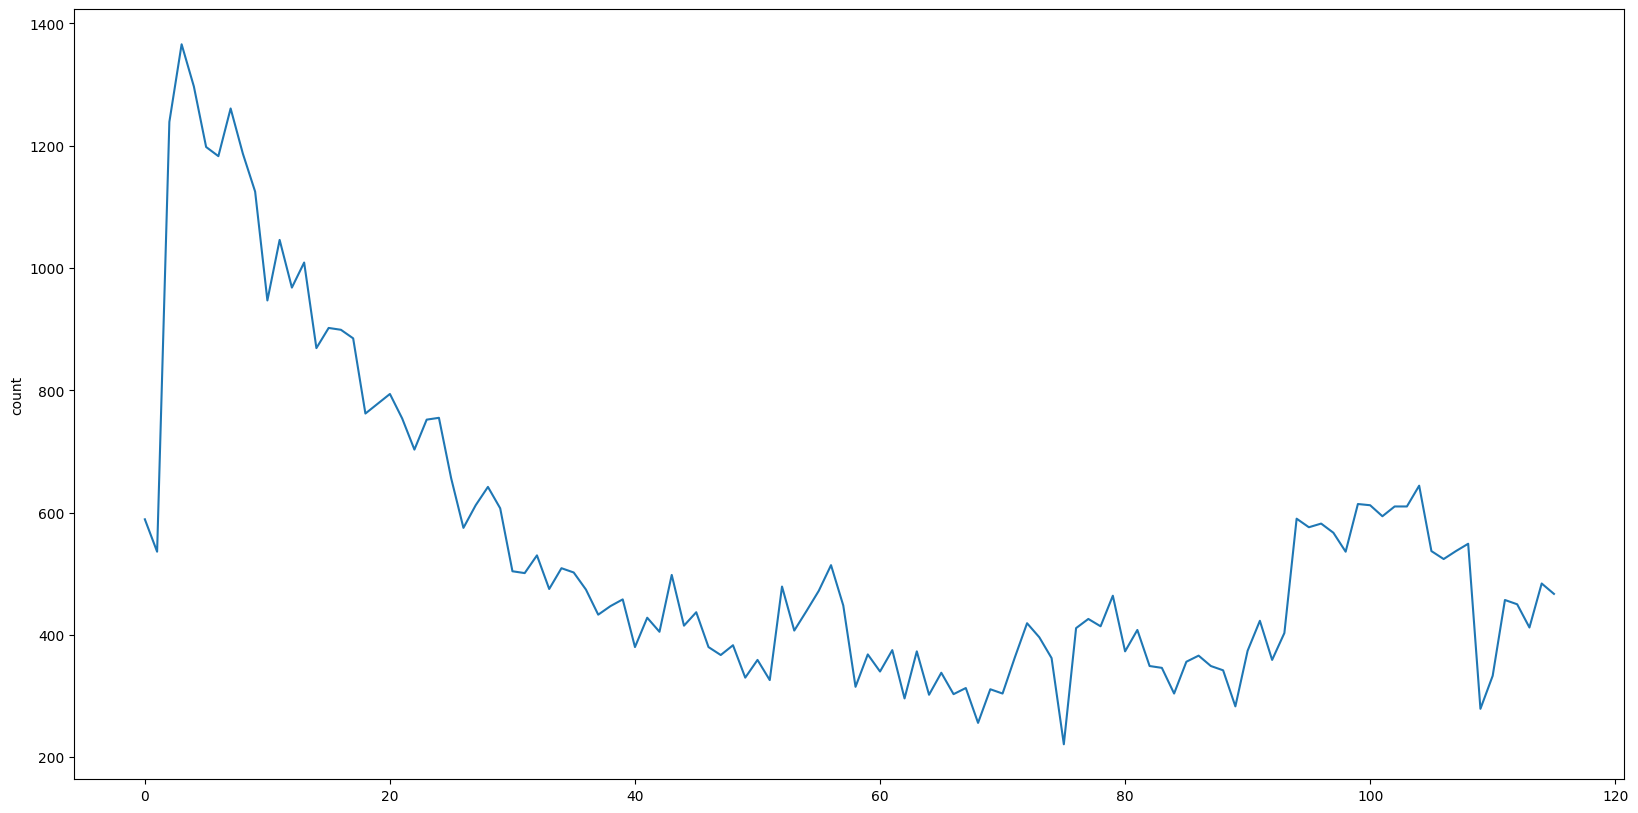

In [10]:
plt.figure(figsize=(20,10))
sns.lineplot(data=time_df,x=time_df.index,y='count')

In [11]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   YearQ   116 non-null    datetime64[ns]
 1   count   116 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 KB


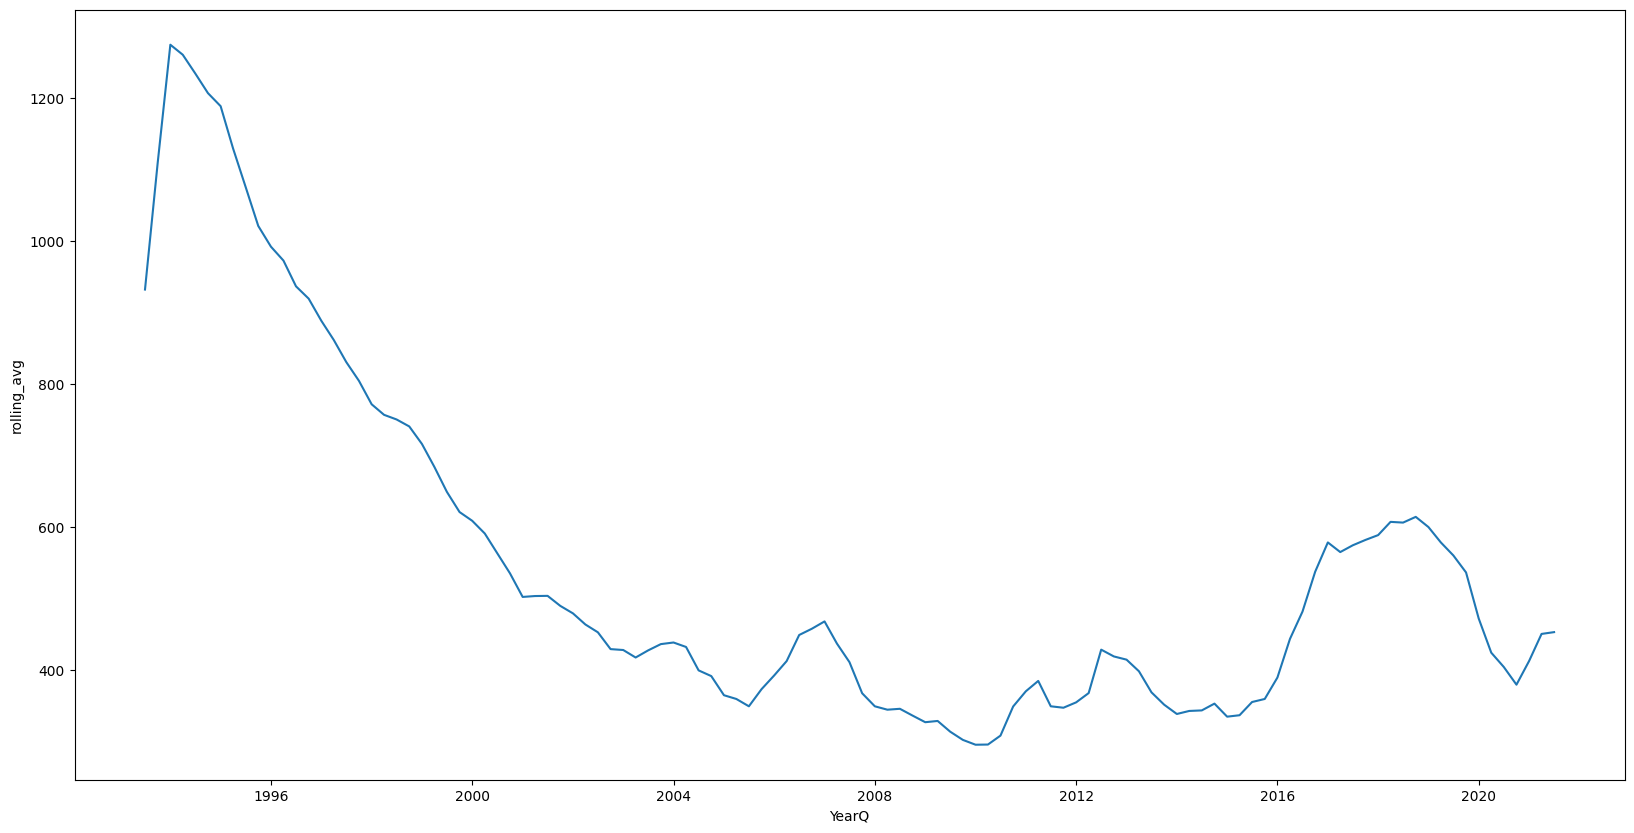

In [12]:
time_df['rolling_avg'] = time_df['count'].rolling(window=4, center=True).mean()

plt.figure(figsize=(20, 10))
sns.lineplot(data=time_df, x='YearQ', y='rolling_avg')
plt.show()

In [13]:
df

,idper,yearq,year,ager,sex,hispanic,race,race_ethnicity,hincome1,hincome2,...,injury,serious,treatment,offenderage,offendersex,offtracenew,wgtviccy,series,newwgt,quarter
0,210176836193319999999923301,2004.1,2004,2,2,2,2,2,1,-1,...,0,1,0,3,1,-1,1952.973730,1,1952.973730,1
1,254207015147069329204211203,2009.1,2009,1,1,2,1,1,7,-1,...,0,1,0,5,1,-1,5570.687730,1,5570.687730,1
2,210313595043196799999912102,2004.1,2004,4,1,2,1,1,5,-1,...,0,1,0,4,1,-1,3366.957480,1,3366.957480,1
3,252018211553075329282015501,2011.4,2011,3,1,1,1,6,5,-1,...,0,1,0,88,1,-1,6991.560610,1,6991.560610,4
4,210376205057919299999921201,2004.1,2004,2,1,2,1,1,6,-1,...,1,3,1,3,3,-1,2834.649050,1,2834.649050,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63460,175644020856124356443623301,2021.3,2021,2,2,2,1,1,7,3,...,0,1,0,4,1,1,1255.609375,1,1255.609375,3
63461,183682680382578456365612501,2021.3,2021,4,2,2,1,1,7,5,...,0,1,0,3,1,2,842.529114,1,842.529114,3
63462,204444199256608656440816204,2021.4,2021,1,1,2,1,1,7,3,...,1,3,1,1,1,7,1029.867432,1,1029.867432,4
63463,190149418435658458825913602,2021.3,2021,2,1,2,1,1,6,3,...,0,1,0,2,1,1,5833.862305,1,5833.862305,3


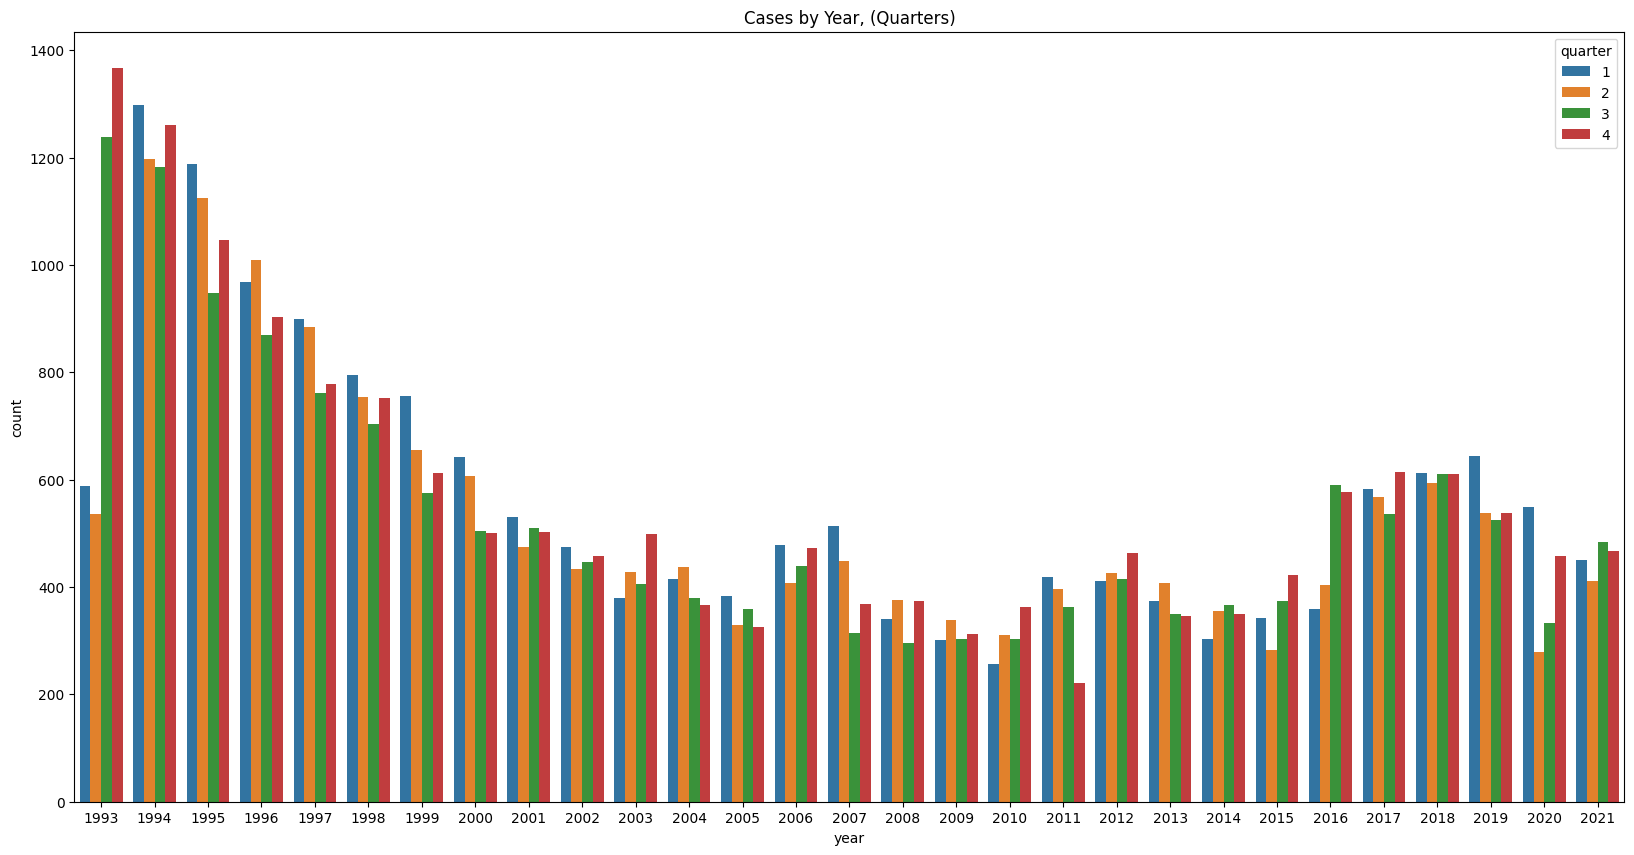

In [14]:
plt.figure(figsize=(20,10))
plt.title('Cases by Year, (Quarters)')
sns.countplot(x=df['year'],hue=df['quarter'])
plt.show()

<Axes: title={'center': 'Cases by Quarter'}, xlabel='quarter', ylabel='count'>

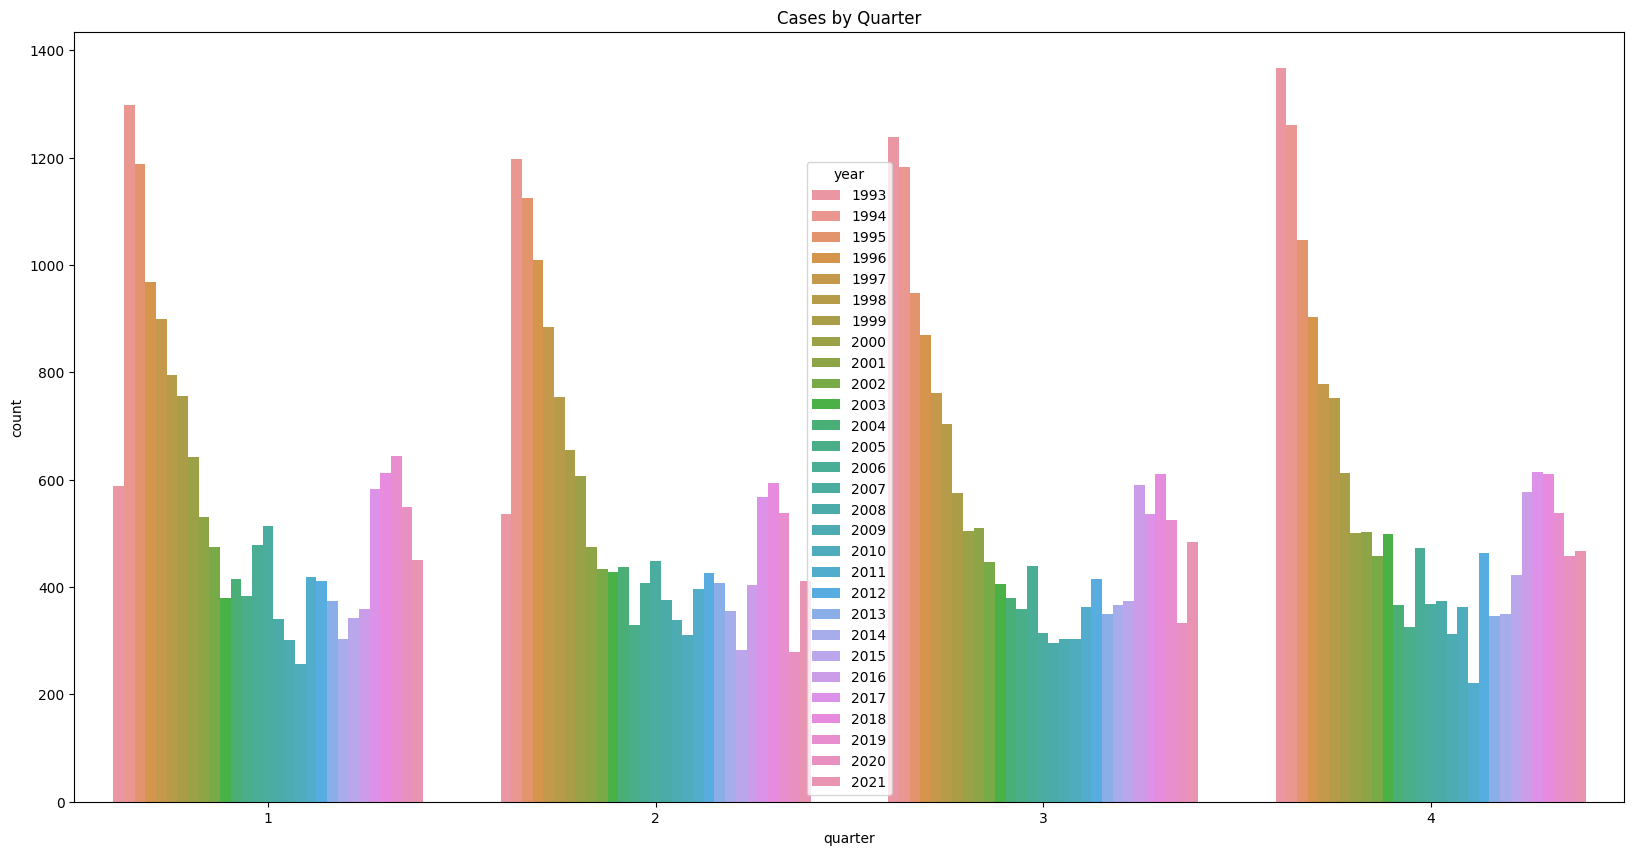

In [15]:

plt.figure(figsize=(20,10))
plt.title('Cases by Quarter')
sns.countplot(x=df['quarter'].sort_values(),hue=df['year'])

<Axes: title={'center': 'Cases by Quarter'}, xlabel='quarter', ylabel='count'>

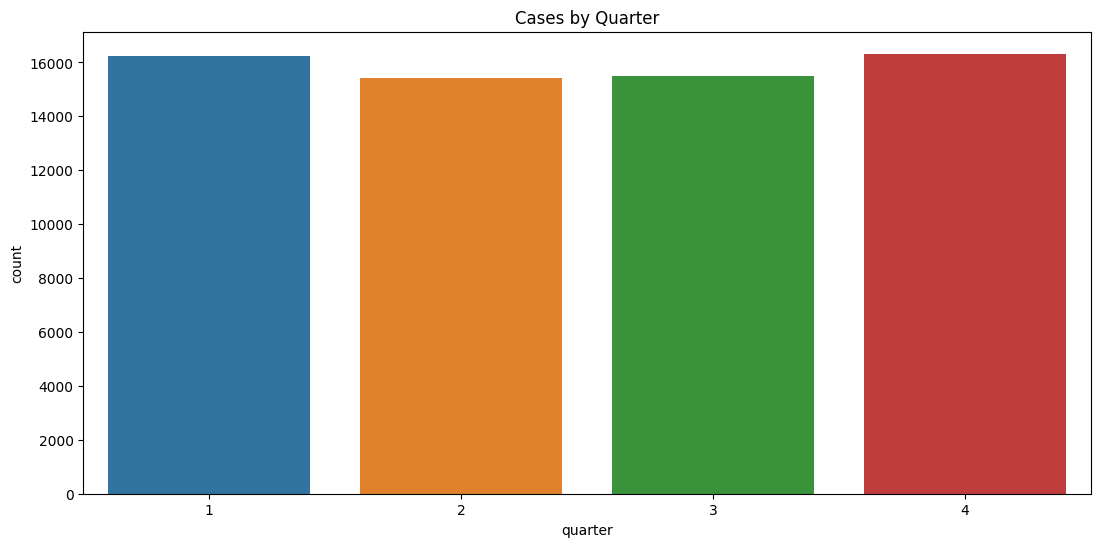

In [16]:
plt.figure(figsize=(13,6))
plt.title('Cases by Quarter')
sns.countplot(x=df['quarter'].sort_values())

In [17]:
time_df = time_df.set_index(['YearQ'])
time_df

,count,rolling_avg
YearQ,,
1993-01-01,589,NaN
1993-04-01,536,NaN
1993-07-01,1239,932.50
1993-10-01,1366,1109.50
1994-01-01,1297,1275.00
...,...,...
2020-10-01,457,379.75
2021-01-01,450,413.00
2021-04-01,412,450.75


In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform time series decomposition
result=seasonal_decompose(time_df['count'], model='additive', period=12)
trend = result.trend
seasonal = result.seasonal
residual = result.resid

<Axes: xlabel='YearQ'>

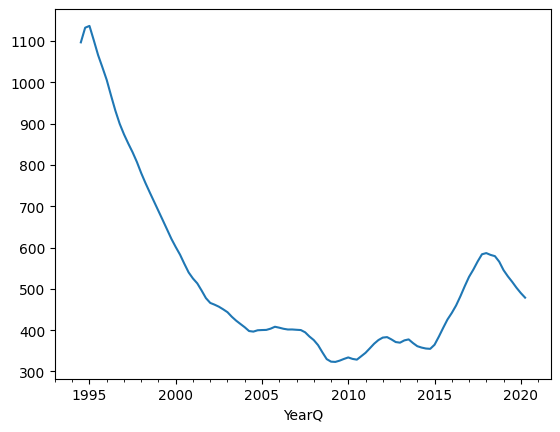

In [19]:
result.trend.plot()

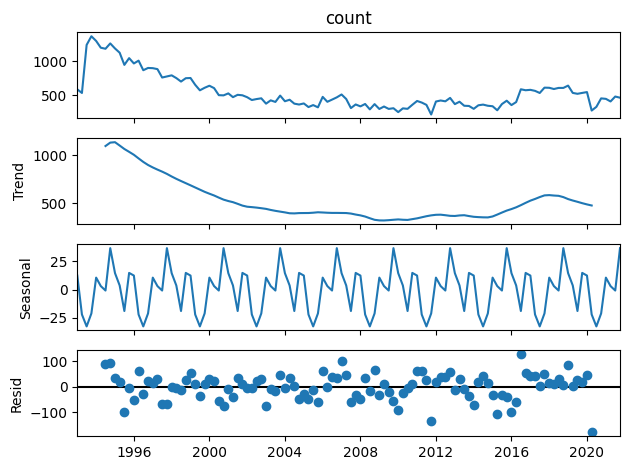

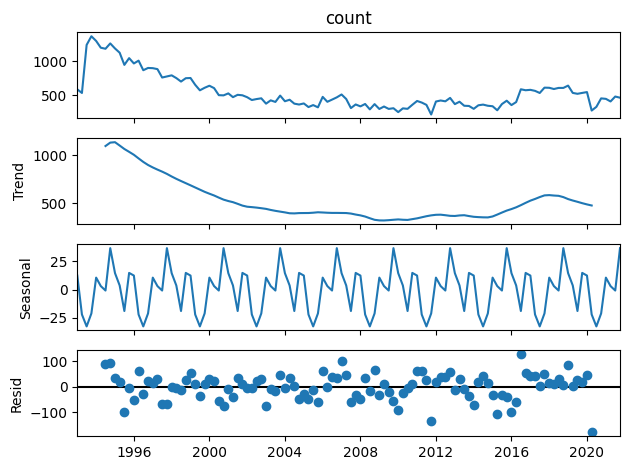

In [20]:
result.plot()

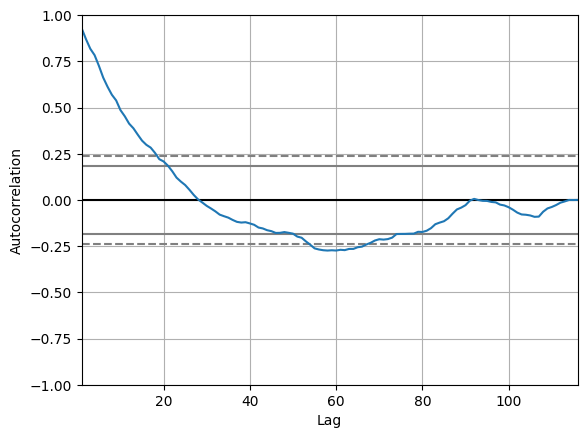

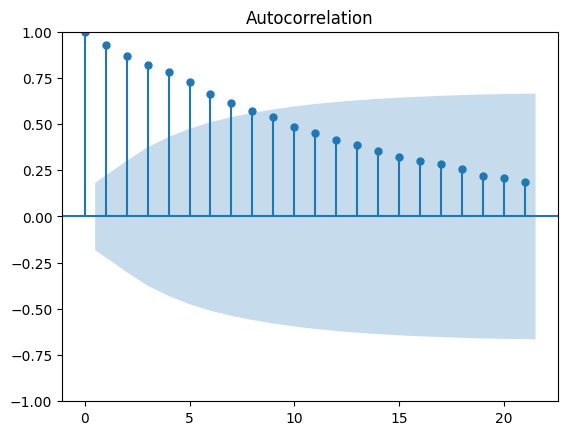

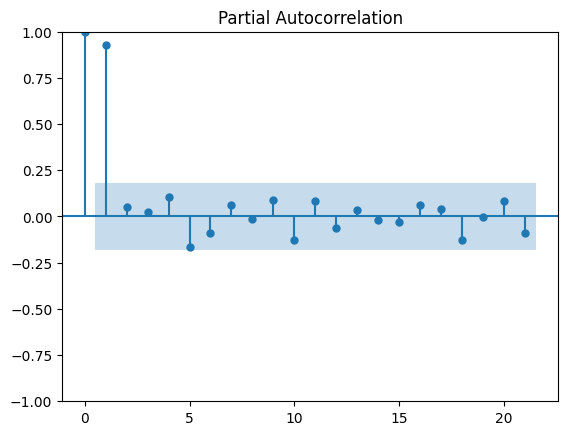

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(time_df['count'])
plot_acf(time_df['count'])
plot_pacf(time_df['count'])
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(time_df['count'])
p_value = result[1]
p_value

0.004184165742665484

In [23]:
from statsmodels.tsa.stattools import kpss

result = kpss(time_df['count'].values, regression = "ct")
p_value = result[1]
if p_value > 0.05:
    print("The data is non-stationary.")
else:
    print("The data is stationary.")

The data is stationary.


C:\Users\marcu\AppData\Local\Temp\ipykernel_17300\3965037788.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(time_df['count'].values, regression = "ct")


Data Splitting


In [24]:
split_index = int(0.8 * len(time_df))
time_df = time_df.drop(columns='rolling_avg')
train_data = time_df.iloc[:split_index]
test_data = time_df.iloc[split_index:]

print("Training data shape:", train_data.shape)

print("Testing data shape:", test_data.shape, test_data)

Training data shape: (92, 1)
Testing data shape: (24, 1)             count
YearQ            
2016-01-01    359
2016-04-01    403
2016-07-01    590
2016-10-01    576
2017-01-01    582
2017-04-01    567
2017-07-01    536
2017-10-01    614
2018-01-01    612
2018-04-01    594
2018-07-01    610
2018-10-01    610
2019-01-01    644
2019-04-01    537
2019-07-01    524
2019-10-01    537
2020-01-01    549
2020-04-01    279
2020-07-01    333
2020-10-01    457
2021-01-01    450
2021-04-01    412
2021-07-01    484
2021-10-01    467


## ARIMA

In [25]:
from statsmodels.tsa.arima.model import ARIMA


In [26]:
 # Define the order of the ARIMA model (p: autoregressive order, d: differencing order, q: moving average order)
model = ARIMA(train_data, order=(20,0,8))
fitted_model = model.fit()

c:\Users\marcu\OneDrive\Documents\repos\NCVS2022Analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\marcu\OneDrive\Documents\repos\NCVS2022Analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\marcu\OneDrive\Documents\repos\NCVS2022Analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\marcu\OneDrive\Documents\repos\NCVS2022Analysis\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary sta

In [27]:
forecast = fitted_model.forecast(steps=len(test_data))


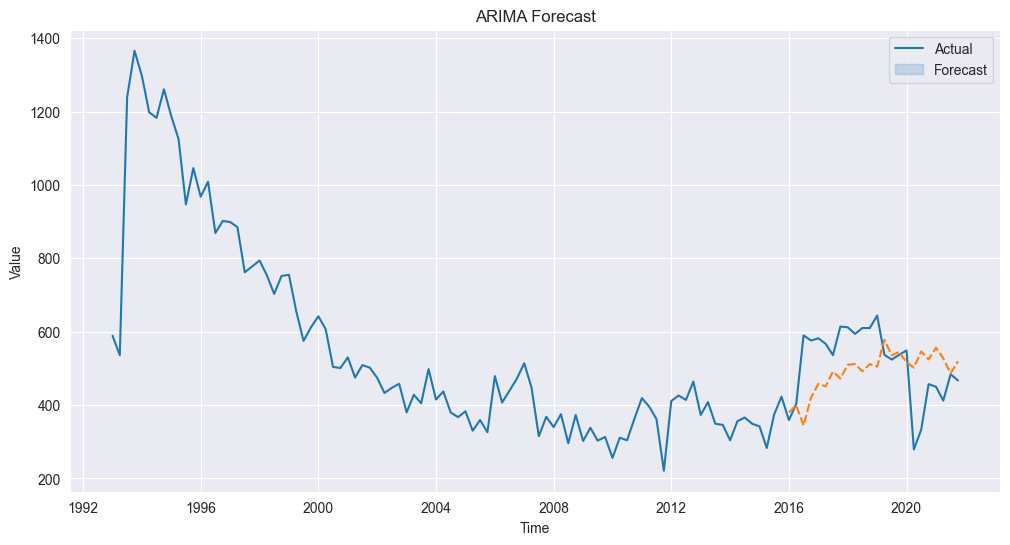

In [28]:

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
vis_df = pd.concat([time_df,forecast])
sns.lineplot(data=vis_df)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Forecast')
plt.legend(['Actual', 'Forecast'])
plt.show()

## ES

In [29]:

from statsmodels.tsa.api import SimpleExpSmoothing


ses = SimpleExpSmoothing(train_data)
alpha = 0.3
model = ses.fit(smoothing_level = alpha, optimized = False)

c:\Users\marcu\OneDrive\Documents\repos\NCVS2022Analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [30]:
forecast = model.forecast(steps=len(test_data))

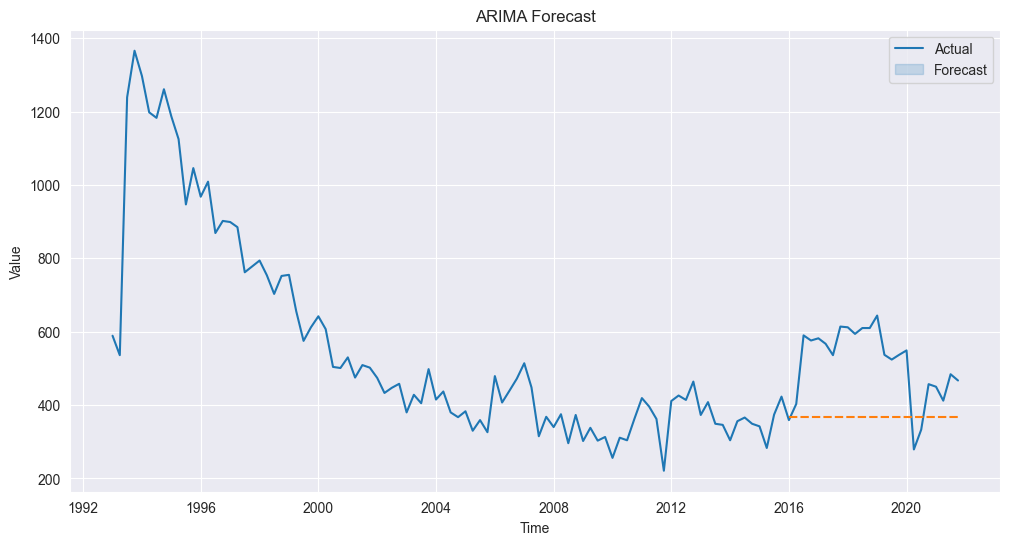

In [31]:

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
vis_df = pd.concat([time_df,forecast])
sns.lineplot(data=vis_df)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Forecast')
plt.legend(['Actual', 'Forecast'])
plt.show()

###  Holt's Linear Exponential Smoothing

### Prophet


In [32]:
from prophet import Prophet

c:\Users\marcu\OneDrive\Documents\repos\NCVS2022Analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [33]:
time_df['count']

YearQ
1993-01-01     589
1993-04-01     536
1993-07-01    1239
1993-10-01    1366
1994-01-01    1297
              ... 
2020-10-01     457
2021-01-01     450
2021-04-01     412
2021-07-01     484
2021-10-01     467
Name: count, Length: 116, dtype: int64

In [34]:
prop_df = pd.DataFrame(columns=['ds','y'])
prop_df['ds'] = time_df.index
prop_df['y'] = time_df['count'].tolist()
prop_df

,ds,y
0,1993-01-01,589
1,1993-04-01,536
2,1993-07-01,1239
3,1993-10-01,1366
4,1994-01-01,1297
...,...,...
111,2020-10-01,457
112,2021-01-01,450
113,2021-04-01,412
114,2021-07-01,484


In [35]:
m = Prophet()
m.fit(prop_df)

11:49:42 - cmdstanpy - INFO - Chain [1] start processing
11:49:42 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
future = m.make_future_dataframe(periods=1000)
future.tail()

,ds
1111,2024-06-23
1112,2024-06-24
1113,2024-06-25
1114,2024-06-26
1115,2024-06-27


In [37]:
forecast = m.predict(future)
forecast = forecast.set_index('ds')

KeyError: 'ds'

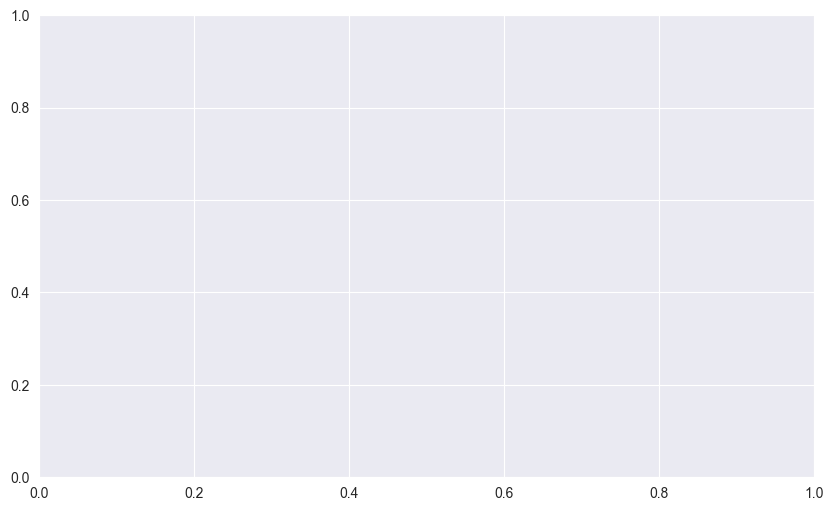

In [38]:
fig1 = m.plot(forecast)